In [1]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('scores_data.csv')

In [4]:
data.head()

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6 / 7
1,AI_ELITE_7,uid_148,6 / 7
2,AI_ELITE_7,uid_147,7 / 7
3,AI_ELITE_7,uid_146,7 / 7
4,AI_ELITE_7,uid_145,4 / 7


In [6]:
data.shape

(149, 3)

In [7]:
data.describe()

,Batch,User_ID,Score
count,149,149,149
unique,3,149,8
top,AI_ELITE_7,uid_149,4 / 7
freq,53,1,40


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Batch        149 non-null    object
 1   User_ID      149 non-null    object
 2      Score     149 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB


In [9]:
data.columns = data.columns.str.replace(' ', '') #Preprocessing of the Data

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Batch    149 non-null    object
 1   User_ID  149 non-null    object
 2   Score    149 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB


### Here we have removed the Keyerror from the dataset 

In [11]:
data.columns[data.isnull().any()], data.isnull().sum()

(Index([], dtype='object'),
 Batch      0
 User_ID    0
 Score      0
 dtype: int64)

In [12]:
Max_marks = 7
data['Score'] = data['Score'].str.replace('/ 7', '')

In [14]:
data['Max_score'] = Max_marks

In [15]:
data

,Batch,User_ID,Score,Max_score
0,AI_ELITE_7,uid_149,6,7
1,AI_ELITE_7,uid_148,6,7
2,AI_ELITE_7,uid_147,7,7
3,AI_ELITE_7,uid_146,7,7
4,AI_ELITE_7,uid_145,4,7
...,...,...,...,...
144,AI_ELITE_4,uid_5,4,7
145,AI_ELITE_4,uid_4,4,7
146,AI_ELITE_4,uid_3,4,7
147,AI_ELITE_4,uid_2,3,7


In [18]:
data['Score'] = data['Score'].astype('int')
data['Max_score'] = data['Max_score'].astype('int')

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Batch      149 non-null    object
 1   User_ID    149 non-null    object
 2   Score      149 non-null    int32 
 3   Max_score  149 non-null    int32 
dtypes: int32(2), object(2)
memory usage: 3.6+ KB


### We have converted the columns Score and Max_score into integer value as the were object in order to ease the further analysis

In [21]:
data.loc[data.Score == 7]

,Batch,User_ID,Score,Max_score
2,AI_ELITE_7,uid_147,7,7
3,AI_ELITE_7,uid_146,7,7
5,AI_ELITE_7,uid_144,7,7
7,AI_ELITE_7,uid_142,7,7
15,AI_ELITE_7,uid_134,7,7
16,AI_ELITE_7,uid_133,7,7
17,AI_ELITE_7,uid_132,7,7
19,AI_ELITE_7,uid_130,7,7
24,AI_ELITE_7,uid_125,7,7
35,AI_ELITE_7,uid_114,7,7


### These are the Students that have got full marks.

In [22]:
data.loc[data.Score == 0]

,Batch,User_ID,Score,Max_score
68,AI_ELITE_6,uid_81,0,7
135,AI_ELITE_4,uid_14,0,7


### These are the Students who Scored 0 Marks

### Now we will Divide the Dataset into three parts viz Three batches.

In [25]:
part_a = data[data['Batch'] == 'AI_ELITE_7']
part_a.head()

,Batch,User_ID,Score,Max_score
0,AI_ELITE_7,uid_149,6,7
1,AI_ELITE_7,uid_148,6,7
2,AI_ELITE_7,uid_147,7,7
3,AI_ELITE_7,uid_146,7,7
4,AI_ELITE_7,uid_145,4,7


In [26]:
part_b = data[data['Batch'] == 'AI_ELITE_6']
part_b.head()

,Batch,User_ID,Score,Max_score
53,AI_ELITE_6,uid_96,3,7
54,AI_ELITE_6,uid_95,4,7
55,AI_ELITE_6,uid_94,6,7
56,AI_ELITE_6,uid_93,6,7
57,AI_ELITE_6,uid_92,4,7


In [27]:
part_c = data[data['Batch'] == 'AI_ELITE_4']
part_c.head()

,Batch,User_ID,Score,Max_score
101,AI_ELITE_4,uid_48,7,7
102,AI_ELITE_4,uid_47,5,7
103,AI_ELITE_4,uid_46,4,7
104,AI_ELITE_4,uid_45,4,7
105,AI_ELITE_4,uid_44,7,7


In [28]:
part_a.loc[part_a.Score == 7] # These are the topper of Batch AI_ELITE_7

,Batch,User_ID,Score,Max_score
2,AI_ELITE_7,uid_147,7,7
3,AI_ELITE_7,uid_146,7,7
5,AI_ELITE_7,uid_144,7,7
7,AI_ELITE_7,uid_142,7,7
15,AI_ELITE_7,uid_134,7,7
16,AI_ELITE_7,uid_133,7,7
17,AI_ELITE_7,uid_132,7,7
19,AI_ELITE_7,uid_130,7,7
24,AI_ELITE_7,uid_125,7,7
35,AI_ELITE_7,uid_114,7,7


In [29]:
part_b.loc[part_b.Score == 7] # These are the toppers of the Batch AI_ELITE_6

,Batch,User_ID,Score,Max_score
63,AI_ELITE_6,uid_86,7,7
67,AI_ELITE_6,uid_82,7,7
74,AI_ELITE_6,uid_75,7,7
78,AI_ELITE_6,uid_71,7,7
98,AI_ELITE_6,uid_51,7,7


In [30]:
part_c.loc[part_c.Score == 7] # These are the toppers of the Batch AI_ELITE_4

,Batch,User_ID,Score,Max_score
101,AI_ELITE_4,uid_48,7,7
105,AI_ELITE_4,uid_44,7,7
139,AI_ELITE_4,uid_10,7,7


### Uptil Now we have found the toppers of Every Batch, now we will find the average of marks scored by each batch.

In [35]:
print("AI_ELITE_7 =", part_a['Score'].mean())
print("AI_ELITE_6 =" ,part_b['Score'].mean())
print("AI_ELITE_4 =",part_c['Score'].mean())

AI_ELITE_7 = 5.056603773584905
AI_ELITE_6 = 4.229166666666667
AI_ELITE_4 = 3.7916666666666665


### We can Clearly see that the batch AI_ELITE_7 has a good average of marks scored by students which indicates that they are the best performing Batch.

<AxesSubplot:>

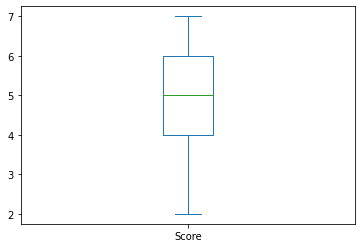

In [36]:
part_a['Score'].plot(kind='box') #Detecting outliers

<AxesSubplot:>

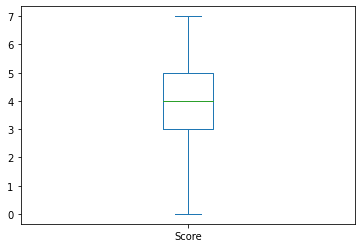

In [37]:
part_b['Score'].plot(kind='box') #Detecting outliers

<AxesSubplot:>

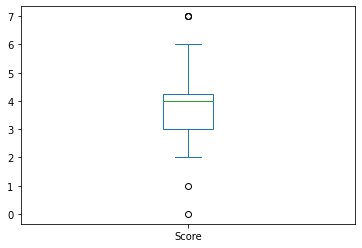

In [39]:
part_c['Score'].plot(kind='box') #Detecting outliers

<AxesSubplot:>

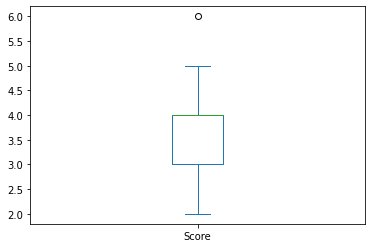

In [41]:
q1 = part_c['Score'].quantile(0.25)
q3 = part_c['Score'].quantile(0.75)

IQR = q3 - q1

income_lower_bound = q1 - 1.5 * IQR
income_upper_bound = q3 + 1.5 * IQR

clean_part_c = part_c[(part_c['Score'] >= income_lower_bound) & (part_c['Score'] <= income_upper_bound)]

clean_part_c['Score'].plot(kind='box')

In [43]:
# Here We Can finally Conclude that after the thorough analysis of the Dtaset we Found:-

# Batch = AI_ELITE_7
# Batch=AI_ELITE_7 is the most Succesful batch with the Highest average Score of 5.05
# There Are no students who have scored 0 marks in this Batch
# There are 10 Students who scored Full 7/7 marks in this Batch

# Batch = AI_ELITE_6
# Batch= AI_ELITE_6 is the second most succesful batch with a average of 4.22
# There is only 1 Student who scored 0 marks 
# There are 5 students who scored full marks

# Batch = AI_ELITE_4
# This batch is the worst performing batch of the given dataset with a average score of 3.79
# There is only 1 Student who scored 0 marks
# There are 3 students who scored Full marks